In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_predict, LeaveOneOut
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MinMaxScaler
import warnings
from sklearn.model_selection import learning_curve

# Code was showing some warnings, from stack overflow optimal answer was to include this
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df= pd.read_csv("fetal_health.csv")

In [3]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

import time
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dt_classifier = DecisionTreeClassifier()
start_time = time.time()
dt_classifier.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time} seconds")


Training time: 0.0 seconds


## Splitting & Using DT


## Using Evaluation Metrics

Accuracy =  92.72300469483568 %
Precision =  0.8705550039918256
Recall =  0.9101164742328535
F1-score =  0.889210214780991


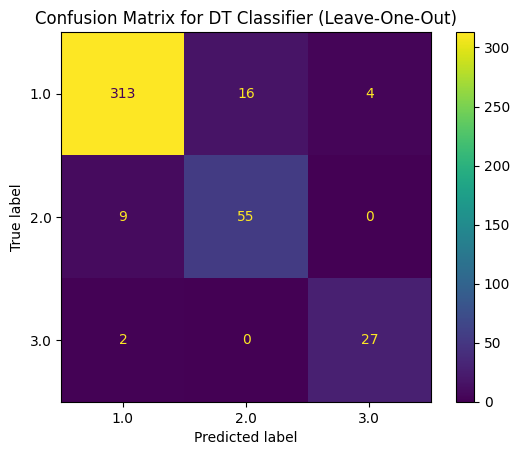

Classification Report
              precision    recall  f1-score   support

         1.0       0.97      0.94      0.95       333
         2.0       0.77      0.86      0.81        64
         3.0       0.87      0.93      0.90        29

    accuracy                           0.93       426
   macro avg       0.87      0.91      0.89       426
weighted avg       0.93      0.93      0.93       426



In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import LeaveOneOut
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
)
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print("Accuracy = ", accuracy_score(y_test, y_pred) * 100, "%")
print("Precision = ", precision_score(y_test, y_pred,average='macro'))
print("Recall = ", recall_score(y_test, y_pred,average='macro'))
print("F1-score = ", f1_score(y_test, y_pred,average='macro'))
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y))
disp.plot()
plt.title('Confusion Matrix for DT Classifier (Leave-One-Out)')
plt.show()
# Using classification report too
print("Classification Report")
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))



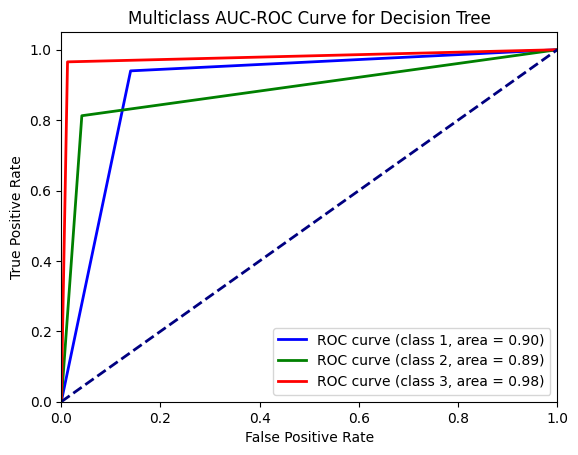

In [6]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

y_test_binarized = label_binarize(y_test, classes=np.unique(y))

y_scores = decision_tree_model.predict_proba(X_test)

n_classes = len(np.unique(y))

plt.figure()

colors = ['b', 'g', 'r']

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_scores[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=f'ROC curve (class {i+1}, area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass AUC-ROC Curve for Decision Tree')
plt.legend(loc="lower right")
plt.show()


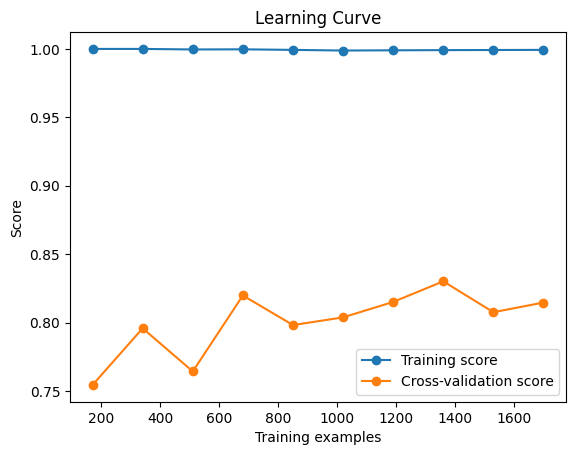

In [7]:
train_sizes, train_scores, test_scores = learning_curve(decision_tree, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

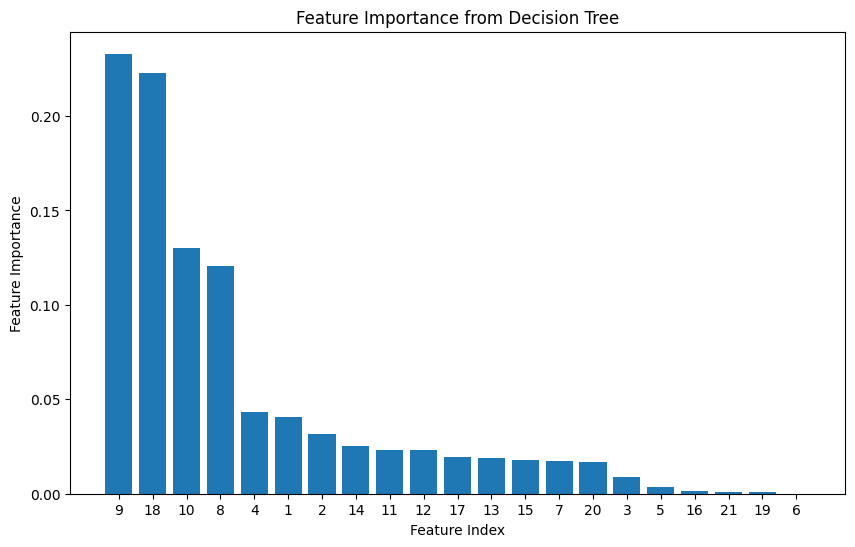

In [8]:
# Get feature importances
feature_importances = decision_tree.feature_importances_

# Get the indices of features sorted by importance
sorted_feature_indices = feature_importances.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), feature_importances[sorted_feature_indices])
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.title('Feature Importance from Decision Tree')
plt.xticks(range(X.shape[1]), sorted_feature_indices + 1)  # Adding 1 to make indices start from 1
plt.show()


In [9]:
top_k_features_indices = sorted_feature_indices[:15]
print("Indices of Important Features:", top_k_features_indices)

X_selected = X.iloc[:, top_k_features_indices]


# print("Adjusted X based on Important Features:")
# print(X_selected)

Indices of Important Features: [ 8 17  9  7  3  0  1 13 10 11 16 12 14  6 19]


## Checking class distribution

Class Distribution:
fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64
Coefficient of Variation (CV): 1.1595095195631708


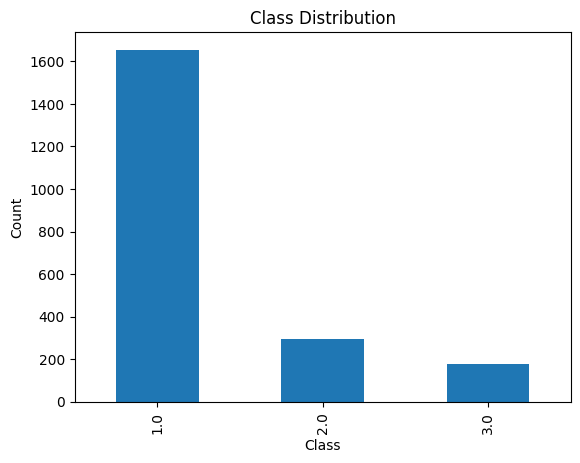

In [10]:

target_column = 'fetal_health'

class_distribution = df[target_column].value_counts()

mean_class_size = class_distribution.mean()
std_class_size = class_distribution.std()
imbalance_cv = std_class_size / mean_class_size

print(f"Class Distribution:\n{class_distribution}")
print(f"Coefficient of Variation (CV): {imbalance_cv}")

class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


## Applying SMOTE


In [11]:
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Apply SMOTE only on the training set
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)




Class Distribution:
fetal_health
1.0    1322
2.0    1322
3.0    1322
Name: count, dtype: int64
Coefficient of Variation (CV): 0.0


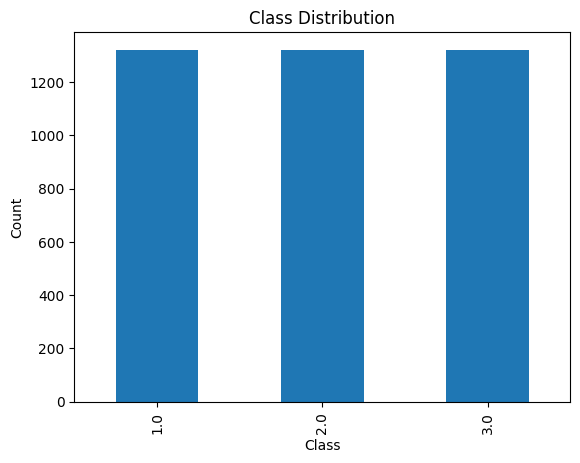

In [12]:


y_resampled_series = pd.Series(y_resampled)

class_distribution = y_resampled_series.value_counts()

mean_class_size = class_distribution.mean()
std_class_size = class_distribution.std()
imbalance_cv = std_class_size / mean_class_size

print(f"Class Distribution:\n{class_distribution}")
print(f"Coefficient of Variation (CV): {imbalance_cv}")

class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


## Using DT

In [13]:


from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.model_selection import cross_val_score, KFold

# y_pred_res = DT_after_smote.predict(X_test)
DT_after_smote =  DecisionTreeClassifier()
DT_after_smote.fit(X_resampled, y_resampled)
y_pred_full = DT_after_smote.predict(X_resampled)
y_pred_test = DT_after_smote.predict(X_test)

# cv = LeaveOneOut()
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# k_folds = 5  # You can change this to the desired number of folds

# # Initialize K-Fold Cross-Validation
# kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# # Perform K-Fold Cross-Validation
# # cross_val_results = cross_val_score(gradient_boosting, X, y, cv=kf)

# y_pred_res = cross_val_predict(DT_after_smote, X_resampled, y_resampled, cv=kf)
# X_test_aligned = X_test[:, top_k_features_indices]



In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

# k-Fold with SMOTE
kf = KFold(n_splits=4, shuffle=True, random_state=42)
smote = SMOTE(sampling_strategy='auto', random_state=42)
accuracy_scores_kfold = []
precision_scores_kfold = []
recall_scores_kfold = []
f1_scores_kfold = []

for train_index, test_index in kf.split(X_selected, y):
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Apply SMOTE only on the training set
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Decision Tree on resampled training set
    decision_tree_after = DecisionTreeClassifier(random_state=42)
    decision_tree_after.fit(X_train_resampled, y_train_resampled)

    # Predictions on the test set
    y_pred_test = decision_tree_after.predict(X_test)

    # Calculate metrics for the test set
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test, average='macro')
    recall_test = recall_score(y_test, y_pred_test, average='macro')
    f1_test = f1_score(y_test, y_pred_test, average='macro')

    accuracy_scores_kfold.append(accuracy_test)
    precision_scores_kfold.append(precision_test)
    recall_scores_kfold.append(recall_test)
    f1_scores_kfold.append(f1_test)

# Calculate mean scores across folds
mean_accuracy_kfold = np.mean(accuracy_scores_kfold)
mean_precision_kfold = np.mean(precision_scores_kfold)
mean_recall_kfold = np.mean(recall_scores_kfold)
mean_f1_kfold = np.mean(f1_scores_kfold)

print(f'k-Fold Metrics (Mean): Accuracy={mean_accuracy_kfold}, Precision={mean_precision_kfold}, Recall={mean_recall_kfold}, F1-Score={mean_f1_kfold}')


k-Fold Metrics (Mean): Accuracy=0.9148719255766535, Precision=0.8508262263878321, Recall=0.8714696728899465, F1-Score=0.8602933807121691


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

# Stratified k-Fold with SMOTE
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
smote = SMOTE(sampling_strategy='auto', random_state=42)
accuracy_scores_stratified_kfold = []
precision_scores_stratified_kfold = []
recall_scores_stratified_kfold = []
f1_scores_stratified_kfold = []

for train_index, test_index in skf.split(X_selected, y):
    X_train, X_test = X_selected.iloc[train_index], X_selected.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Apply SMOTE only on the training set
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Decision Tree on resampled training set
    decision_tree_after = DecisionTreeClassifier(random_state=42)
    decision_tree_after.fit(X_train_resampled, y_train_resampled)

    # Predictions on the test set
    y_pred_test = decision_tree_after.predict(X_test)

    # Calculate metrics for the test set
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test, average='macro')
    recall_test = recall_score(y_test, y_pred_test, average='macro')
    f1_test = f1_score(y_test, y_pred_test, average='macro')

    accuracy_scores_stratified_kfold.append(accuracy_test)
    precision_scores_stratified_kfold.append(precision_test)
    recall_scores_stratified_kfold.append(recall_test)
    f1_scores_stratified_kfold.append(f1_test)

# Calculate mean scores across folds
mean_accuracy_stratified_kfold = np.mean(accuracy_scores_stratified_kfold)
mean_precision_stratified_kfold = np.mean(precision_scores_stratified_kfold)
mean_recall_stratified_kfold = np.mean(recall_scores_stratified_kfold)
mean_f1_stratified_kfold = np.mean(f1_scores_stratified_kfold)

print(f'Stratified k-Fold Metrics (Mean): Accuracy={mean_accuracy_stratified_kfold}, Precision={mean_precision_stratified_kfold}, Recall={mean_recall_stratified_kfold}, F1-Score={mean_f1_stratified_kfold}')


Stratified k-Fold Metrics (Mean): Accuracy=0.9134541863132407, Precision=0.833975184919007, Recall=0.8578301928617643, F1-Score=0.8448240371947721


## Using Evaluation Metrics

Accuracy (Resampled): 100.0 %
Precision (macro, Resampled): 1.0
Recall (macro, Resampled): 1.0
F1-score (macro, Resampled): 1.0
Confusion Matrix (Resampled):


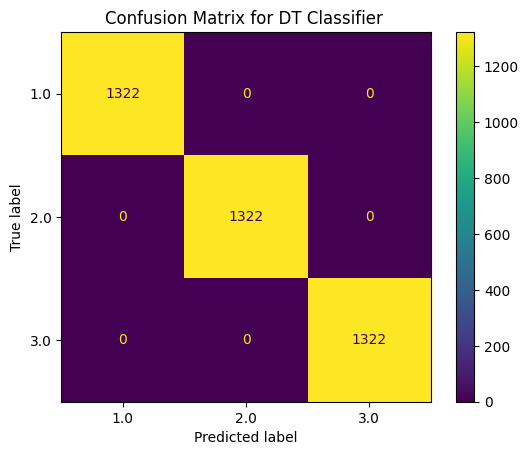

Classification Report (Resampled):
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      1322
         2.0       1.00      1.00      1.00      1322
         3.0       1.00      1.00      1.00      1322

    accuracy                           1.00      3966
   macro avg       1.00      1.00      1.00      3966
weighted avg       1.00      1.00      1.00      3966

Test Accuracy: 90.96045197740112 %
Test Precision (macro): 0.8186821705426356
Test Recall (macro): 0.8545330212989534
Test F1-score (macro): 0.8348146940472572


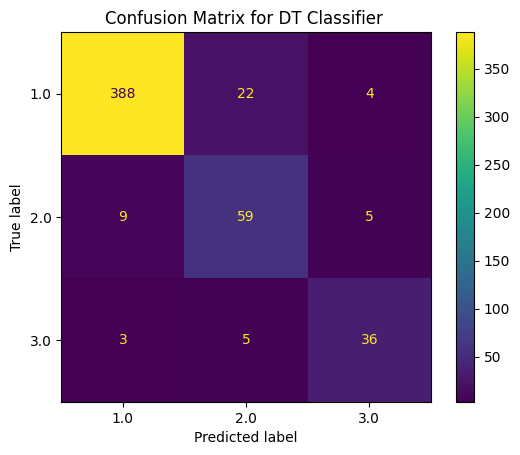

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

accuracy_resampled = accuracy_score(y_resampled, y_pred_full)
precision_resampled = precision_score(y_resampled, y_pred_full, average='macro')
recall_resampled = recall_score(y_resampled, y_pred_full, average='macro')
f1_resampled = f1_score(y_resampled, y_pred_full, average='macro')

conf_matrix_resampled = confusion_matrix(y_resampled, y_pred_full)
class_report_resampled = classification_report(y_resampled, y_pred_full)

print("Accuracy (Resampled):", accuracy_resampled * 100, "%")
print("Precision (macro, Resampled):", precision_resampled)
print("Recall (macro, Resampled):", recall_resampled)
print("F1-score (macro, Resampled):", f1_resampled)

print("Confusion Matrix (Resampled):")
conf_matrix = confusion_matrix(y_resampled, y_pred_full)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y))
disp.plot()
plt.title('Confusion Matrix for DT Classifier ')
plt.show()
print("Classification Report (Resampled):")
print(class_report_resampled)


test_accuracy = accuracy_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test, average='macro')
test_recall = recall_score(y_test, y_pred_test, average='macro')
test_f1 = f1_score(y_test, y_pred_test, average='macro')
test_conf_matrix = confusion_matrix(y_test, y_pred_test)

print("Test Accuracy:", test_accuracy * 100, "%")
print("Test Precision (macro):", test_precision)
print("Test Recall (macro):", test_recall)
print("Test F1-score (macro):", test_f1)

conf_matrix = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y))
disp.plot()
plt.title('Confusion Matrix for DT Classifier ')
plt.show()



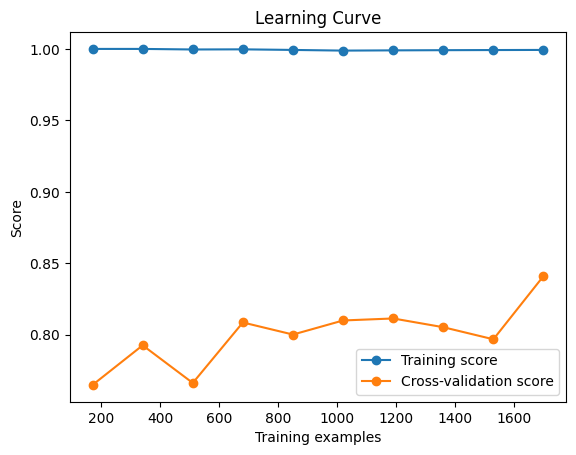

In [17]:
train_sizes, train_scores, test_scores = learning_curve(DT_after_smote, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label="Training score")
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()

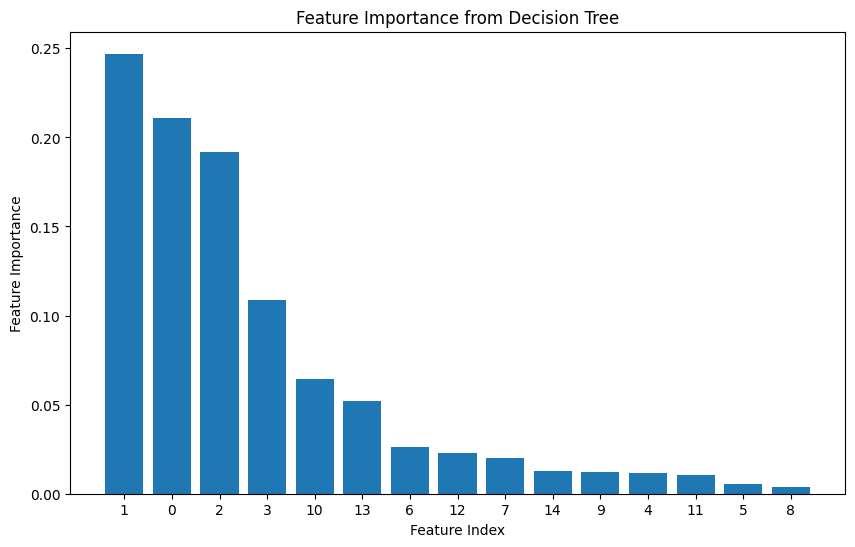

In [18]:
feature_importances = DT_after_smote.feature_importances_

sorted_feature_indices = feature_importances.argsort()[::-1]

num_features_to_plot = 15

plt.figure(figsize=(10, 6))
plt.bar(range(num_features_to_plot), feature_importances[sorted_feature_indices[:num_features_to_plot]])
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.title('Feature Importance from Decision Tree')
plt.xticks(range(num_features_to_plot), sorted_feature_indices[:num_features_to_plot])
plt.show()


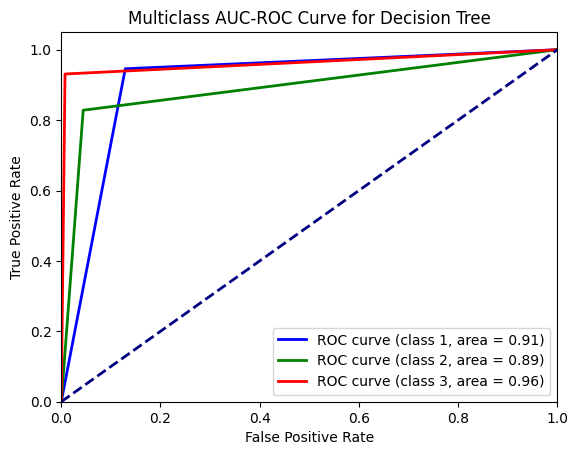

In [19]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)

y_test_binarized = label_binarize(y_test, classes=np.unique(y))

y_scores = decision_tree_model.predict_proba(X_test)

n_classes = len(np.unique(y))

plt.figure()

colors = ['b', 'g', 'r']

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_scores[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], lw=2, label=f'ROC curve (class {i+1}, area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass AUC-ROC Curve for Decision Tree')
plt.legend(loc="lower right")
plt.show()
